### Multiple Input and Output Channels
- multi-input channels 
  - convlutionsal kerner with same number of input channels as the input image
  - kw x kh x input_channels => multi-input channel convolutional kernel
  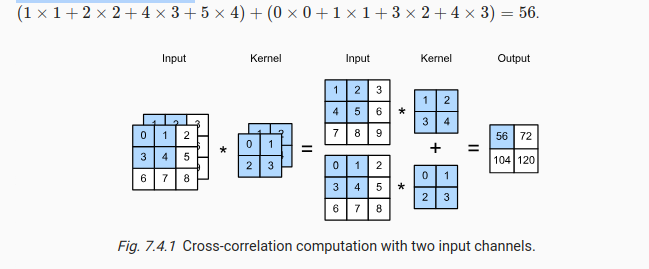

  - mult-output channels
    - we usually increase channels as get deeper in the network.
    - for output with multi-channel, co,ci output and input channels, use kernel ternsor $co * ci * kh * kw$

In [26]:
import torch
from d2l import torch as d2l

In [27]:
def corr2d_muli_in(X, K):
    # Iterate through the 0th dimension (channel) of K first, then add them up
    return sum(d2l.corr2d(x, k) for x,k in zip(X,K))

In [28]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])

K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_muli_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [29]:
# multi-output
def corrd2d_multi_in_out(X, K):
        # Iterate through the 0th dimension of K, and each time, perform
    # cross-correlation operations with input X. All of the results are
    # stacked together
    return torch.stack([corr2d_muli_in(X, k) for k in K], 0)

In [30]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

tensor([[[0., 1.],
         [2., 3.]],

        [[1., 2.],
         [3., 4.]]])
tensor([[[1., 2.],
         [3., 4.]],

        [[2., 3.],
         [4., 5.]]])
tensor([[[2., 3.],
         [4., 5.]],

        [[3., 4.],
         [5., 6.]]])


In [16]:
corrd2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [39]:
# 1x2 convolutional layer - convolutional layer requires co * xi weights (plus bias)
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    # Matrix multiply in the fully connected layer 
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [43]:
X = torch.normal(9, 1, (3,3,3)) # 3c x 3h x 3w
K = torch.normal(0, 1, (2, 3, 1, 1)) # 2o x 3c x 1h x 1w
Y1 = corr2d_multi_in_out_1x1(X, K)
print(Y1.shape)
Y2 = corrd2d_multi_in_out(X, K)
print(Y2.shape)
assert float(torch.abs(Y1-Y2).sum()) < 1e-6 # get to same values

torch.Size([2, 3, 3])
torch.Size([2, 3, 3])
